In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import  metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
os.chdir(r"C:\Users\Archit\Desktop\Training\Imarticus\DSP\DSP41\Class15_16")

In [87]:
diabetes_data = pd.read_csv('diabetes.csv')

In [88]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [90]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [91]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
# p = diabetes_data.hist(figsize = (20,20))

In [92]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [12]:
# p = diabetes_data_copy.hist(figsize = (20,20))

In [93]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
# # sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
# plt.xlabel("count of each data type")
# plt.ylabel("data types")
# plt.show()

In [15]:
#import missingno as msno
#p=msno.bar(diabetes_data)

In [94]:
diabetes_data_copy["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
268/(268+500)

0.3489583333333333

In [95]:
d=diabetes_data_copy.corr()
d.to_excel("corr.xlsx" )

In [96]:
X1 = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

In [97]:
from sklearn.preprocessing import StandardScaler  # (x-mu)/sigma
sc_X = StandardScaler()


In [100]:
pd.DataFrame(sc_X.fit_transform(X1), 
             columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [102]:
X =  pd.DataFrame(sc_X.fit_transform(X1),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [103]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [104]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [109]:
knn = KNeighborsClassifier(n_neighbors=11)  # By default  n_neighbors=5
knn.fit(X_train,y_train)
print("Score on Train data",knn.score(X_train,y_train))
print("Score on Test data",knn.score(X_test,y_test))

Score on Train data 0.783203125
Score on Test data 0.76953125


In [112]:
# help(KNeighborsClassifier)

In [113]:
test_scores = []
train_scores = []
for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [114]:
train_scores

[1.0,
 0.837890625,
 0.857421875,
 0.8046875,
 0.82421875,
 0.791015625,
 0.80859375,
 0.791015625,
 0.802734375,
 0.77734375,
 0.783203125,
 0.783203125,
 0.7890625,
 0.779296875,
 0.78125,
 0.779296875,
 0.779296875,
 0.767578125,
 0.791015625,
 0.775390625,
 0.791015625,
 0.775390625,
 0.77734375,
 0.759765625,
 0.771484375,
 0.771484375,
 0.787109375,
 0.775390625,
 0.78515625,
 0.779296875,
 0.78125,
 0.779296875,
 0.787109375,
 0.77734375,
 0.787109375,
 0.77734375,
 0.779296875,
 0.7734375,
 0.7734375,
 0.76953125,
 0.765625,
 0.765625,
 0.76953125,
 0.7734375,
 0.77734375,
 0.7734375,
 0.7734375,
 0.775390625,
 0.775390625]

In [115]:
test_scores

[0.71875,
 0.6953125,
 0.6875,
 0.71875,
 0.73046875,
 0.734375,
 0.76171875,
 0.75390625,
 0.765625,
 0.765625,
 0.76953125,
 0.75390625,
 0.7578125,
 0.734375,
 0.76171875,
 0.734375,
 0.74609375,
 0.73046875,
 0.73828125,
 0.73828125,
 0.73828125,
 0.73828125,
 0.73828125,
 0.734375,
 0.73828125,
 0.7265625,
 0.72265625,
 0.72265625,
 0.71875,
 0.73828125,
 0.7421875,
 0.74609375,
 0.73828125,
 0.74609375,
 0.73828125,
 0.734375,
 0.73046875,
 0.74609375,
 0.734375,
 0.73828125,
 0.73828125,
 0.734375,
 0.734375,
 0.73828125,
 0.7421875,
 0.7421875,
 0.73828125,
 0.7421875,
 0.7421875]

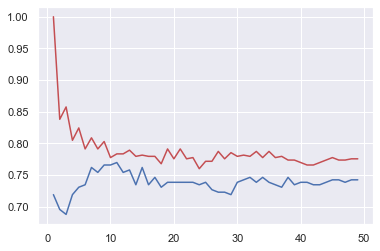

In [116]:
import matplotlib.pyplot as plt

plt.plot(range(1,50), train_scores, color="r")
plt.plot(range(1,50), test_scores)

In [117]:
#The best result is captured at k = 11 hence 11 is used for the final model from above
#Setup a knn classifier with k neighbors
knn11 = KNeighborsClassifier(11)
knn11.fit(X_train,y_train)
print("Score on Train data",knn11.score(X_train,y_train))
print("Score on Test data",knn11.score(X_test,y_test))

Score on Train data 0.783203125
Score on Test data 0.76953125


In [118]:
from sklearn import metrics

In [119]:
Pred_train=knn11.predict(X_train)

In [120]:
print(metrics.classification_report(y_train, Pred_train))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       333
           1       0.75      0.56      0.65       179

    accuracy                           0.78       512
   macro avg       0.77      0.73      0.74       512
weighted avg       0.78      0.78      0.77       512



In [121]:
metrics.confusion_matrix(y_train, Pred_train)

array([[300,  33],
       [ 78, 101]], dtype=int64)

In [122]:
Pred_test=knn11.predict(X_test)

In [123]:
print(metrics.classification_report(y_test, Pred_test))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       167
           1       0.71      0.56      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



### Working on Train Data 

In [125]:
knn11.predict_proba(X_train)[:,1]

array([0.36363636, 0.54545455, 0.27272727, 0.        , 0.54545455,
       0.09090909, 0.27272727, 0.27272727, 0.72727273, 0.09090909,
       0.45454545, 0.36363636, 0.27272727, 0.36363636, 0.18181818,
       0.        , 0.54545455, 0.09090909, 0.        , 0.54545455,
       0.27272727, 0.45454545, 0.        , 0.81818182, 0.63636364,
       0.18181818, 0.45454545, 0.72727273, 0.72727273, 0.09090909,
       0.        , 0.63636364, 0.18181818, 0.09090909, 0.09090909,
       0.09090909, 0.63636364, 0.09090909, 0.72727273, 0.36363636,
       0.72727273, 1.        , 0.        , 0.45454545, 0.72727273,
       0.18181818, 0.90909091, 0.09090909, 0.72727273, 0.18181818,
       0.36363636, 0.54545455, 0.36363636, 0.18181818, 0.        ,
       0.36363636, 0.09090909, 0.45454545, 0.36363636, 0.18181818,
       0.18181818, 0.        , 0.09090909, 0.72727273, 0.63636364,
       0.27272727, 0.72727273, 0.09090909, 0.09090909, 0.        ,
       0.54545455, 0.81818182, 0.        , 0.81818182, 0.81818

In [126]:
def profile_decile(X,y, trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred=trained_model.predict(X_1)
    X_1["Prob_event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred
    X_1["Rank"]=pd.qcut(X_1["Prob_event"],10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    profile=pd.DataFrame(X_1.groupby("Decile")\
                        .apply(lambda x: pd.Series({
        "min_score": x["Prob_event"].min(),
        "max_score": x["Prob_event"].max(),
        "Bad":x["Y_actual"].sum(),
        "Good":x["Y_actual"].count()-x["Y_actual"].sum(),
        "Total":x["Y_actual"].count() })))
    return profile

In [128]:
# profile_decile(X_train,y_train, knn11)

In [129]:
X_train1=X_train.copy()

In [130]:
X_train1["y_actual"]=y_train
X_train1["y_pred"]=Pred_train
X_train1["Prob_1"]=knn11.predict_proba(X_train)[:,1]

In [131]:
X_train1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_actual,y_pred,Prob_1
657,-0.844885,-0.027996,0.563223,1.722735,1.043689,0.876685,2.084255,0.660206,0,0,0.363636
462,1.233880,-1.467665,0.046245,1.220910,-0.267429,0.419775,0.704061,0.490030,0,1,0.545455
171,0.639947,0.410164,0.046245,0.154533,0.435886,0.432467,0.211782,-0.360847,1,0,0.272727
210,-0.547919,-1.248585,-0.470732,0.091805,-0.692891,-0.544811,-0.549288,-0.701198,0,0,0.000000
147,-0.547919,-0.466156,-0.263941,0.907270,0.340374,-0.189437,2.803044,0.064591,0,1,0.545455
...,...,...,...,...,...,...,...,...,...,...,...
113,0.046014,-1.405071,-0.367337,-1.288212,-0.692891,0.254780,-0.244256,-0.701198,0,0,0.090909
556,-0.844885,-0.747831,0.046245,1.220910,-0.692891,0.775149,-0.766737,-0.275760,0,0,0.000000
254,2.421746,-0.904316,-0.367337,-0.849116,1.547297,-0.557503,1.371507,0.915469,1,1,0.545455
647,-1.141852,1.818535,-0.987710,0.969998,0.687690,0.737074,-0.050968,-0.956462,1,1,0.909091


In [78]:
X_train1.to_excel("Train.xlsx")

In [132]:
X_train1["New_Pred"]=np.where(X_train1["Prob_1"]>=0.363636363636364, 1,0)

In [133]:
print(metrics.classification_report(X_train1["y_actual"], X_train1["New_Pred"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       333
           1       0.67      0.67      0.67       179

    accuracy                           0.77       512
   macro avg       0.75      0.75      0.75       512
weighted avg       0.77      0.77      0.77       512



In [ ]:
knn11.predict_proba(new)

In [ ]:
p >0.23

In [85]:
# Reciever Operator Charactersistics

In [134]:
from sklearn.metrics import roc_curve
y_pred_proba = knn11.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

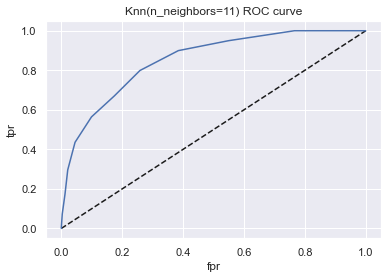

In [135]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [136]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_train, y_pred_proba)
AUC

0.8520979079638297

In [138]:
from joblib import dump
from joblib import load 

In [84]:
# Area under the curve

### Working on Test Data